In [68]:
# Define states
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [69]:
# Define nodes
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

In [70]:
# Define edges
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:
    print("State:", state)
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

In [71]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Define StateGraph
builder = StateGraph(State)

# Add nodes
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Add edges
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Build StateGraph
graph = builder.compile()

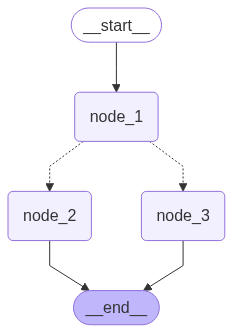

In [72]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [73]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Node 1---
State: {'graph_state': 'Hi, this is Lance. I am'}
---Node 2---


{'graph_state': 'Hi, this is Lance. I am happy!'}